This notebook is dedicated to group a real estate data. We want to group the advertisements of the same property in the same group.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import datetime
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from random import randint

In [ ]:
ads_data=pd.read_excel("/content/drive/MyDrive/Dataset - Ads _ Levallois-Perret - 2019-08.xlsx")
ads_data.shape

(2164, 57)

In [ ]:
n_row, n_col =ads_data.shape
ads_data.head(10)

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,LAND_SURFACE,BALCONY_SURFACE,TERRACE_SURFACE,ROOM_COUNT,BEDROOM_COUNT,BATHROOM_COUNT,LUNCHROOM_COUNT,TOILET_COUNT,FURNISHED,FIREPLACE,AIR_CONDITIONING,GARDEN,SWIMMING_POOL,BALCONY,TERRACE,CELLAR,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,ENERGY_CONSUMPTION,GREENHOUSE_GAS_CONSUMPTION,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,PUBLICATION_END_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE
0,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,0.0,"Au rez de chaussée d'un bel immeuble récent,ap...","[""https://cf-medias.avendrealouer.fr/image/_87...",72.00,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.0,[],COLLECTIVE,NaN,NaN,NaN,1.0,NaN,NaN,NaN,RENT,1979.0,27.49,"[{""price"":1979,""date"":""2017-03-22""}]",276.00,1.0,NaN,NaN,NaN,False,NaN,NaN,Lamirand Et Associes,AGENCY,54178039,Levallois-Perret,92300.0,92,2017-03-22T04:07:56.095,NaN,2017-04-21T18:52:35.733,NaT
1,8d092fa0-bb99-11e8-a7c9-852783b5a69d,https://www.bienici.com/annonce/ag440414-16547...,BIEN_ICI,APARTMENT,0.0,Je vous propose un appartement dans la rue Col...,"[""http://photos.ubiflow.net/440414/165474561/p...",48.00,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,NaN,[],INDIVIDUAL,1.0,6.0,NaN,1.0,0.0,NaN,NaN,SALE,429000.0,8937.50,"[{""price"":452000.0,""date"":""2018-09-18""},{""pric...",NaN,NaN,NaN,NaN,0.0,False,NaN,0.0,Proprietes Privees,MANDATARY,54178039,Levallois-Perret,92300.0,92,2018-09-18T11:04:44.461,NaN,2019-06-06T10:08:10.89,2018-09-25
2,44b6a5c0-3466-11e9-8213-25cc7d9bf5fc,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,APARTMENT,0.0,"Dans un cadre arboré, calme et fleuri, un pent...","[""https://v.seloger.com/s/width/965/visuels/0/...",267.00,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SALE,4970000.0,18614.23,"[{""price"":4970000.0,""date"":""2019-02-19""}]",NaN,NaN,NaN,NaN,NaN,False,NaN,0.0,Propriétés Parisiennes,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-19T16:49:03.547,NaN,2019-06-13T08:22:14.314,NaT
3,e9e07ed0-812f-11e8-82aa-61eacebe4584,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,0.0,"""Le meilleur coworking flexible de la ville, 5...","[""https://pix.yanport.com/ads/e9e07ed0-812f-11...",50.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RENT,89.0,1.78,"[{""price"":89.0,""date"":""2018-07-06""}]",NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,Iwg,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-07-06T15:18:59.805,NaN,2019-06-18T10:40:07.405,NaT
4,872302b0-5a21-11e9-950c-510fefc1ed35,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,HOUSE,0.0,Levallois - Parc de la Planchette A toute prox...,"[""https://v.seloger.com/s/width/966/visuels/0/...",330.00,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SALE,2790000.0,8454.55,"[{""price"":3150000.0,""date"":""2019-04-08""},{""pri...",NaN,NaN,NaN,NaN,NaN,False,NaN,0.0,Daniel Feau Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-08T17:12:20.123,NaN,2019-06-14T15:02:18.155,2019-06-14
5,de04afa0-2e5f-11e8-bda5-3334b193df7f,https://immobilier.lefigaro.fr/annonces/annonc...,EXPLORIMMO,APARTMENT,0.0,LEVALLOIS - FRONT DE SEINE - 5-6 PIECES Appart...,"[""http://photo3.pericles.fr/photo_get.php?S1=3...",142.76,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SALE,1420000.0,9946.76,"[{""price"":1420000.0,""date"":""2018-03-23""}]",NaN,NaN,NaN,NaN,0.0,False,NaN,0.0,Building Partners,AGE

In [ ]:
nans_data=pd.DataFrame()
for column_name in ads_data.columns:
  nans_data.loc[column_name,"NaN count"]=ads_data[column_name].isna().sum()
  nans_data.loc[column_name,"NaN percentage"]=nans_data.loc[column_name,"NaN count"]/n_row * 100
nans_data.sort_values(by=["NaN percentage"], ascending=False, inplace=True)

In [ ]:
nans_data

,NaN count,NaN percentage
TOILET_COUNT,2164.0,100.000000
GREENHOUSE_GAS_CONSUMPTION,2164.0,100.000000
PUBLICATION_END_DATE,2164.0,100.000000
AIR_CONDITIONING,2164.0,100.000000
FIREPLACE,2164.0,100.000000
CELLAR,2164.0,100.000000
LUNCHROOM_COUNT,2164.0,100.000000
BATHROOM_COUNT,2164.0,100.000000
BALCONY_SURFACE,2164.0,100.000000
BALCONY,2164.0,100.000000


We have 2164 different announcements, where each entry have at maximum 57 variables (some contain NaN values).
\
We delete the entries with NaN values percentage = 100%

In [ ]:
cols_to_drop=[col for col in nans_data.index if (int(nans_data.loc[col,"NaN percentage"])==100)]
ads_data.drop(cols_to_drop, axis=1, inplace=True)

Some variables also have unchanging and insignificant values

In [ ]:
print("Les valeurs de CITY_ID: "+str(len(set(ads_data["CITY_ID"].values))))
print("Les valeurs de CITY: "+str(len(set(ads_data["CITY"].values))))
print("Les valeurs de ZIP_CODE: "+ str(len(set(ads_data["ZIP_CODE"].values)))) # une entrée avec NaN qu'on néglige
print("Les valeurs de DEPT_CODE: "+str(len(set(ads_data["DEPT_CODE"].values)))) #URL est un identifiant comme ID
print("Les valeurs de URL: "+str(len(set(ads_data["URL"].values)))) #URL est un identifiant comme ID

Les valeurs de CITY_ID: 1
Les valeurs de CITY: 1
Les valeurs de ZIP_CODE: 2
Les valeurs de DEPT_CODE: 1
Les valeurs de URL: 2164


In [ ]:
# les valeurs de URL 
cols_to_drop2=['CITY_ID', 'CITY', 'ZIP_CODE', 'DEPT_CODE', 'URL']
#enlever ces colonnes
ads_data.drop(cols_to_drop2, axis=1, inplace=True)

The variables LAND_SURFACE, SWIMMING_POOL, GARDEN, TERRACE_SURFACE, DEPOSIT, TERRACE, FEES, PARKING_COUNT, CARETAKER are eliminated because they have high NaN percentage and don't contribute to the data becasue theie NaN values are not caused by another variable. They are Missing Completely at Random (MCAR).

Columns with NaN values are said to be Missing Completely at Random (MCAR) if the randomness of NaN values does not depend on the presence of the value of another variable or its specific value. 

In [ ]:
cols_to_drop3=["SWIMMING_POOL", "GARDEN", "LAND_SURFACE", "TERRACE_SURFACE", "DEPOSIT", "TERRACE", "PARKING_COUNT"]
ads_data.drop(cols_to_drop3, axis=1, inplace=True)

Using the msno library, we can observe the missing values for the remaining variables: the white colour means missing values.

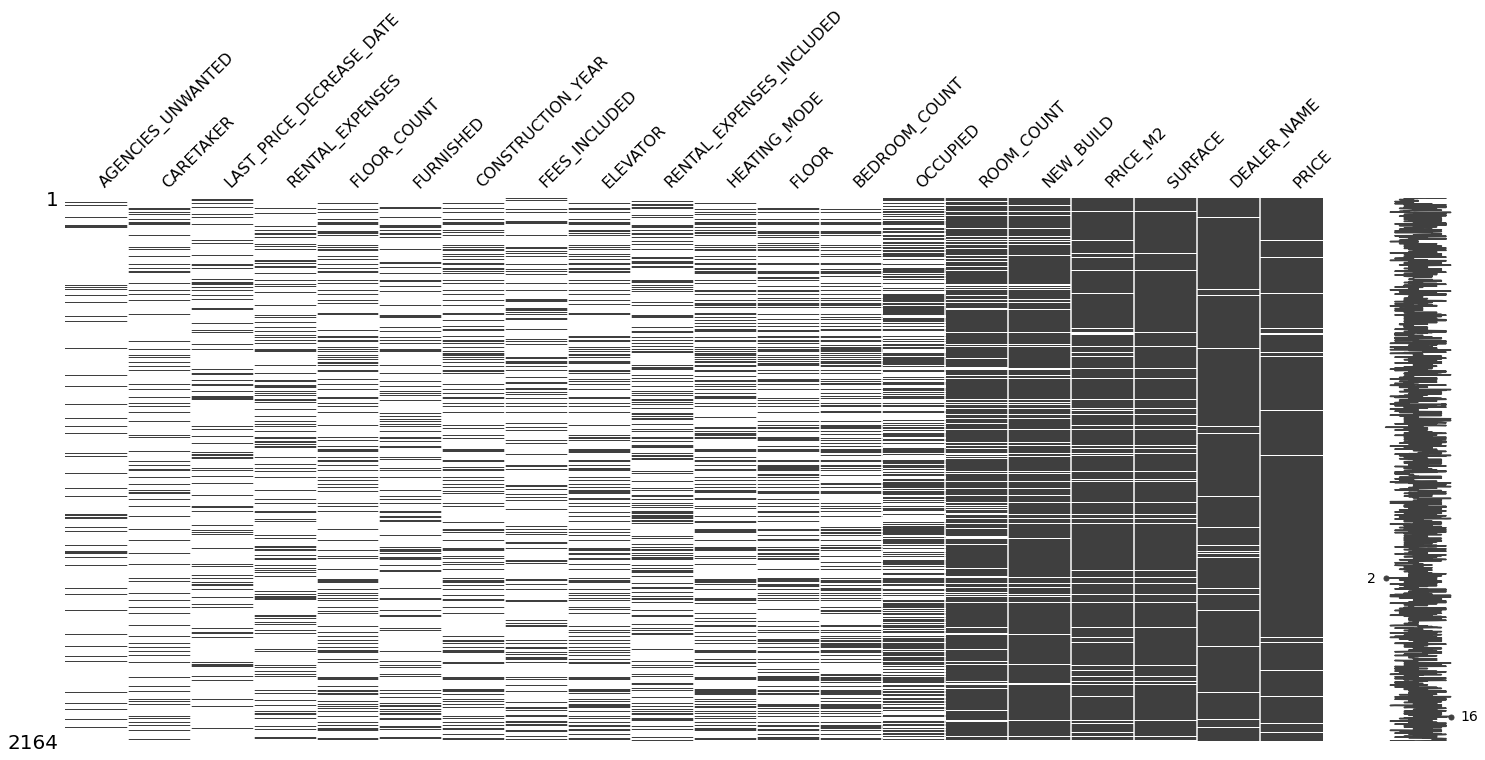

In [ ]:
cols_with_NaN=[col for col in nans_data.index if ((int(nans_data.loc[col,"NaN percentage"])>0) & (int(nans_data.loc[col,"NaN percentage"])<90.74))]
NaN_cols_data=ads_data[cols_with_NaN]

msno.matrix(NaN_cols_data)

On cherche s'il y a une relation entre les champs manquants de PRICE, PRICE_M2 et SURFACE

In [ ]:
d=ads_data[["PRICE", "PRICE_M2", "SURFACE"]]
print("Toutes les offres")
print("offres avec valeurs Prix/m² manquants " +str(len(d[d.PRICE_M2.isnull()])))
print("offres avec valeurs Surface manquants " +str(len(d[d.SURFACE.isnull()])))
print("offres avec valeurs Prix manquants " +str(len(d[d.PRICE.isnull()])))


d2=ads_data[ads_data["MARKETING_TYPE"]=="RENT"][["PRICE", "PRICE_M2", "SURFACE"]]
print("\noffres RENT")
print("offres avec valeurs Prix/m² manquantes " +str(len(d2[d2.PRICE_M2.isnull()])))
print("offres avec valeurs Surface manquantes " +str(len(d2[d2.SURFACE.isnull()])))
print("offres avec valeurs Prix manquantes " +str(len(d2[d2.PRICE.isnull()])))

d3=ads_data[ads_data["MARKETING_TYPE"]=="SALE"][["PRICE", "PRICE_M2", "SURFACE"]]
print("\noffres SALE")
print("offres avec valeurs Prix/m² manquantes " +str(len(d3[d3.PRICE_M2.isnull()])))
print("offres avec valeurs Surface manquantes " +str(len(d3[d3.SURFACE.isnull()])))
print("offres avec valeurs Prix manquantes " +str(len(d3[d3.PRICE.isnull()])))

Toutes les offres
offres avec valeurs Prix/m² manquants 173
offres avec valeurs Surface manquants 114
offres avec valeurs Prix manquants 60

offres RENT
offres avec valeurs Prix/m² manquantes 119
offres avec valeurs Surface manquantes 61
offres avec valeurs Prix manquantes 59

offres SALE
offres avec valeurs Prix/m² manquantes 54
offres avec valeurs Surface manquantes 53
offres avec valeurs Prix manquantes 1


In [ ]:
d=ads_data[["PRICE", "PRICE_M2", "SURFACE"]]
print("Toutes les offres")
print("Offers with PRICE/m² missing " +str(len(d[d.PRICE_M2.isnull()])))
print("Offers with SURFACE missing " +str(len(d[d.SURFACE.isnull()])))
print("Offers with PRICE missing " +str(len(d[d.PRICE.isnull()])))


d2=ads_data[ads_data["MARKETING_TYPE"]=="RENT"][["PRICE", "PRICE_M2", "SURFACE"]]
print("\noffres RENT")
print("Offers with PRICE/m² missing " +str(len(d2[d2.PRICE_M2.isnull()])))
print("Offers with SURFACE missing " +str(len(d2[d2.SURFACE.isnull()])))
print("Offers with PRICE missing " +str(len(d2[d2.PRICE.isnull()])))

d3=ads_data[ads_data["MARKETING_TYPE"]=="SALE"][["PRICE", "PRICE_M2", "SURFACE"]]
print("\noffres SALE")
print("Offers with PRICE/m² missing " +str(len(d3[d3.PRICE_M2.isnull()])))
print("Offers with SURFACE missing " +str(len(d3[d3.SURFACE.isnull()])))
print("Offers with PRICE missing " +str(len(d3[d3.PRICE.isnull()])))

All the offers
Offers with PRICE/m² missing 173
Offers with SURFACE missing 114
Offers with PRICE missing 60

Rent offers
Offers with PRICE/m² missing 119
Offers with SURFACE missing 61
Offers with PRICE missing 59

Sale offers
Offers with PRICE/m² missing 54
Offers with SURFACE missing 53
Offers with PRICE missing 1


60+114 = 174 $\approx$ 173. The count for both categories makes sense. In other terms: 

1. If SURFACE is missing, PRICE_M2 is missing
2. If PRICE is missing, PRICE_M2 is missing  

We can say that PRICE_M2 is completely determined from SURFACE and PRICE. It is possible then to drop it.

PRICE_EVENTS also describes the price evolution according to specifhic dates with a dictinnary(key=date and value=price).
\
PUBLICATION_START_DATE describes the date of announcing the first prince
LAST_PRICE_DECREASE_DATE describes the latest date of price modification.

In [ ]:
print("Evolution du prix: " +str(ads_data.loc[6,"PRICE_EVENTS"]))
print("Date du début prix: " +str(ads_data.loc[6,"PUBLICATION_START_DATE"]))
print("Date du dernier prix: " +str(ads_data.loc[6,"LAST_PRICE_DECREASE_DATE"]))

Evolution du prix: [{"price":1925,"date":"2017-04-27"},{"price":1845,"date":"2017-05-19"},{"price":1925,"date":"2017-05-22"},{"price":1967,"date":"2017-06-09"},{"price":1965.0,"date":"2018-10-25"},{"price":1845.0,"date":"2019-03-29"},{"price":1800.0,"date":"2019-05-10"},{"price":1740.0,"date":"2019-07-10"}]
Date du début prix: 2017-04-27T01:35:00.674
Date du dernier prix: 2019-07-10 00:00:00


To avoid data overflow (too much data that can cause overfit) we can only keep the first and last entry price entries (and their dates). If there is only one price value (price hasn't changed), it will be the same date and price.  

In [ ]:
#somtimes PRICE has NaN, but the price value is stocked in the dictionnary PRICES_EVENTS
ads_data[ads_data["PRICE"].isnull()]["PRICE_EVENTS"]

15                [{"price":75000.0,"date":"2019-04-16"}]
54                   [{"price":1.17,"date":"2019-08-08"}]
76      [{"price":179000.0,"date":"2019-06-05"},{"pric...
104     [{"price":70000.0,"date":"2019-06-11"},{"price...
136     [{"price":105881.0,"date":"2019-04-03"},{"pric...
151               [{"price":60000.0,"date":"2019-07-12"}]
173     [{"price":168000.0,"date":"2018-10-13"},{"pric...
240               [{"price":95000.0,"date":"2019-05-07"}]
355               [{"price":85000.0,"date":"2019-04-18"}]
383               [{"price":70000.0,"date":"2019-04-09"}]
413              [{"price":270000.0,"date":"2019-06-18"}]
422     [{"price":110000.0,"date":"2019-07-13"},{"pric...
442              [{"price":180000.0,"date":"2019-06-11"}]
449               [{"price":80000.0,"date":"2018-10-09"}]
482               [{"price":95000.0,"date":"2019-06-05"}]
523               [{"price":90000.0,"date":"2019-07-06"}]
542              [{"price":132000.0,"date":"2019-07-29"}]
546           

We replace the missing PRICE values and create the columns FIRST_PRICE, FIRST_DATE, LAST_PRICE, LAST_DATE

In [ ]:
import json
ads_data[ ads_data['RENTAL_EXPENSES'].notnull()].loc[67,"PRICE_EVENTS"]
for i in ads_data.index:
  list = json.loads(ads_data.loc[i, "PRICE_EVENTS"]) 
  first=list[0]
  last=list[-1]
  ads_data.loc[i,"FIRST_PRICE"]= first["price"]
  ads_data.loc[i,"FIRST_DATE"]= first["date"]
  ads_data.loc[i,"LAST_PRICE"]= last["price"]
  ads_data.loc[i,"LAST_DATE"]= last["date"]
ads_data[["PRICE", "FIRST_PRICE", "LAST_PRICE","FIRST_DATE", "LAST_DATE","PRICE_EVENTS"]].sort_values(by="FIRST_DATE")



,PRICE,FIRST_PRICE,LAST_PRICE,FIRST_DATE,LAST_DATE,PRICE_EVENTS
216,520000.0,499000.0,520000.0,2015-08-26,2018-04-24,"[{""price"":499000,""date"":""2015-08-26""},{""price""..."
1980,890.0,860.0,890.0,2015-08-31,2019-08-07,"[{""price"":860,""date"":""2015-08-31""},{""price"":89..."
1828,1695000.0,1695000.0,1695000.0,2015-11-26,2015-11-26,"[{""price"":1695000,""date"":""2015-11-26""}]"
830,1790000.0,1790000.0,1790000.0,2016-02-06,2016-02-06,"[{""price"":1790000,""date"":""2016-02-06""}]"
1151,1790000.0,1790000.0,1790000.0,2016-02-06,2016-02-06,"[{""price"":1790000,""date"":""2016-02-06""}]"
...,...,...,...,...,...,...
1824,1010.0,1010.0,1010.0,2019-08-27,2019-08-27,"[{""price"":1010.0,""date"":""2019-08-27""}]"
315,749000.0,749000.0,749000.0,2019-08-27,2019-08-27,"[{""price"":749000.0,""date"":""2019-08-27""}]"
313,88200.0,88200.0,88200.0,2019-08-27,2019-08-27,"[{""price"":88200.0,""date"":""2019-08-27""}]"
309,127900.0,127900.0,127900.0,2019-08-27,2019-08-27,"[{""price"":127900.0,""date"":""2019-08-27""}]"


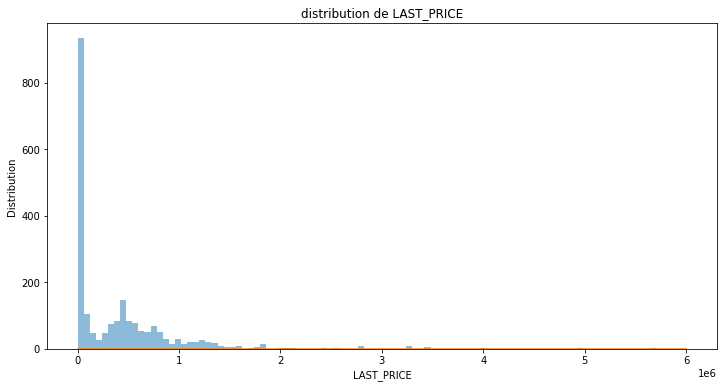

In [ ]:
_, ax = plt.subplots(figsize = (12,6))
_, bins, _ = plt.hist(ads_data["LAST_PRICE"], 100, density=0, alpha=0.5)
plt.ylabel('Distribution')
plt.title("distribution de LAST_PRICE")
plt.xlabel('LAST_PRICE')
mu, sigma = scipy.stats.norm.fit((ads_data["LAST_PRICE"]))
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.show()

In [ ]:
print(bins[1])
n=len(ads_data)
n1=len(ads_data[ads_data["LAST_PRICE"]<bins[1]])
print("Most of the values are inferior to "+str(bins[1])+" ;percentage= "+str(100*n1/n))

60001.158299999996
Most of the values are inferior to 60001.158299999996 ;pourcentage= 43.160813308687615%


In [ ]:
ads_data["SURFACE"]=ads_data["SURFACE"].astype('float')

TypeError: ignored

There are some outalyers of datetime type in SURFACE columns that must be replaced.

In [ ]:
l1= [x for x in ads_data.index if type(ads_data.loc[x,"SURFACE"])==datetime.datetime]
for i in l1:
  if i in ads_data[ads_data["PRICE_M2"].notnull()].index:
    ads_data.loc[i,"SURFACE"]=float(ads_data.loc[i,"LAST_PRICE"])/float(ads_data.loc[i,"PRICE_M2"])
  else:
    ads_data.loc[i,"SURFACE"]=np.nan

In [ ]:
ads_data["SURFACE"]=ads_data["SURFACE"].astype("float").round(decimals=1)

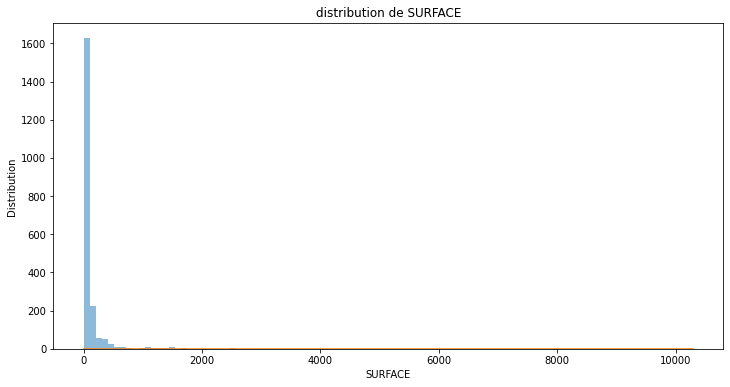

In [ ]:
_, ax = plt.subplots(figsize = (12,6))
_, bins, _ = plt.hist(ads_data[ads_data["SURFACE"].notnull()]["SURFACE"], 100, density=0, alpha=0.5)
plt.ylabel('Distribution')
plt.title("distribution de SURFACE")
plt.xlabel('SURFACE')
mu, sigma = scipy.stats.norm.fit((ads_data[ads_data["SURFACE"].notnull()]["SURFACE"]))
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.show()

The same thing goes for SURFACE. The surfaces distribution is concentrated in the first intervall.
\
We try to check the distribution of PRICE/m². 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


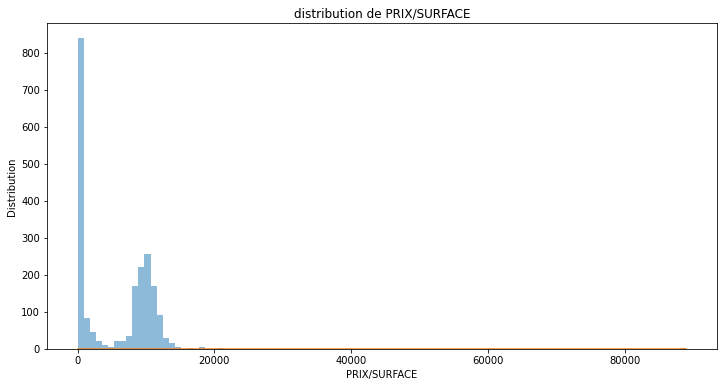

In [ ]:
df=ads_data[ads_data["SURFACE"].notnull()]
df["PRICE/SURFACE"]=df["LAST_PRICE"]/df["SURFACE"]
_, ax = plt.subplots(figsize = (12,6))
_, bins, _ = plt.hist(df["PRICE/SURFACE"], 100, density=0, alpha=0.5)
plt.ylabel('Distribution')
plt.title("distribution de PRIX/SURFACE")
plt.xlabel('PRIX/SURFACE')
mu, sigma = scipy.stats.norm.fit(df["PRICE/SURFACE"])
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.show()

In [ ]:
#supprimer les colonnes qui ne sont plus utiles 
ads_data.drop(["PRICE",	"PRICE_EVENTS", "PRICE_M2", "PUBLICATION_START_DATE", "LAST_PRICE_DECREASE_DATE"], axis=1, inplace=True)

We use missingno to analyze the NaN values of a certain variabe and their correlation with the existance/non existance of the other variables.


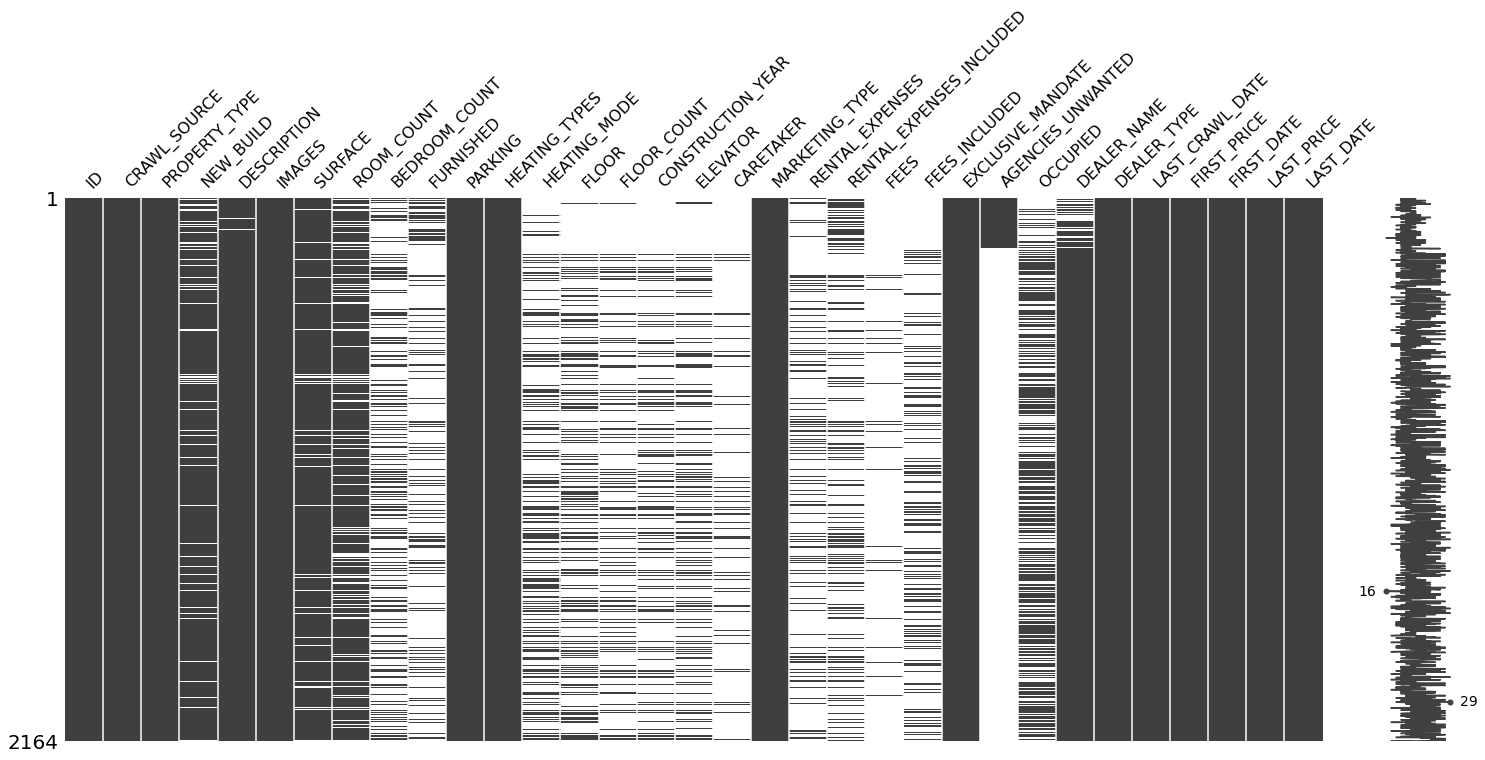

In [ ]:
sorted = ads_data.sort_values('AGENCIES_UNWANTED')
msno.matrix(sorted)

When AGENCIES_UNWANTED are missing, DEADLER_TYPE existing variables are AGENCY and MANDATARY.

Text(0.5, 1.0, 'DEALER_TYPE pour les entrées à AGENCIES_UNWANTED=NaN')

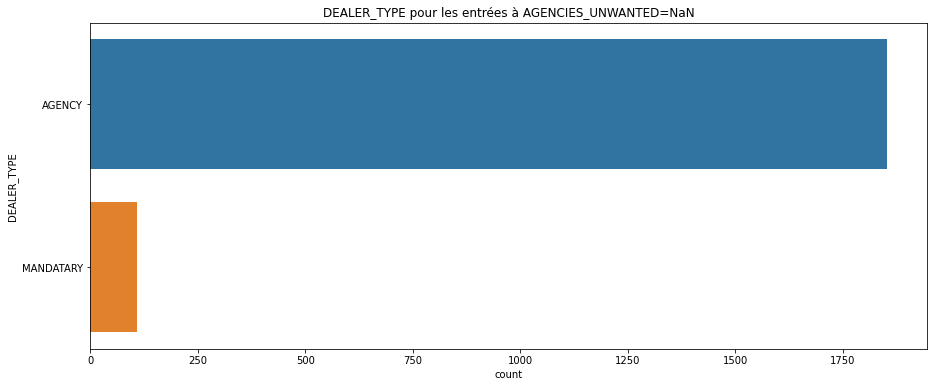

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(y="DEALER_TYPE", data=ads_data[ads_data["AGENCIES_UNWANTED"].isnull()])
plt.title('DEALER_TYPE pour les entrées à AGENCIES_UNWANTED=NaN')

Text(0.5, 1.0, 'DEALER_TYPE pour les entrées à AGENCIES_UNWANTED!=NaN')

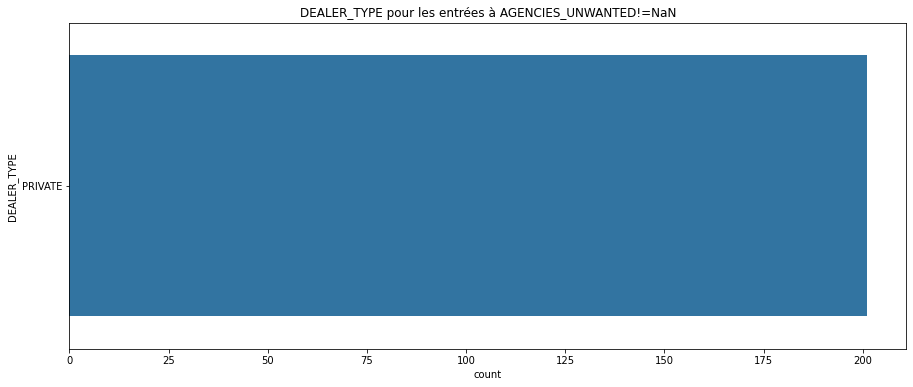

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(y="DEALER_TYPE", data=ads_data[ads_data["AGENCIES_UNWANTED"].notnull()])
plt.title('DEALER_TYPE pour les entrées à AGENCIES_UNWANTED!=NaN')

We can conclude that AGENCIES_UNWANTED concerns DEALERèTYPE=PRIVATE entries and DEALER_TYPE $\ne$ PRIVATE contain DEALER_UNWANTE$=$NaN entries.
\
So, AGENCIES_UNWANTED is Missing at Random (MAR); it depends on the DEALER_TYPE value. So, NaN are meant to express that it's not possible to fill AGENCIES_UNWANTED when DEALER_TYPE$\ne$PRIVATE.
\
We can assign to them the value 'None'.

In [ ]:
ads_data["AGENCIES_UNWANTED"].fillna("NOT_PRIVATE", inplace=True)
set(ads_data["AGENCIES_UNWANTED"].values)

{0.0, 1.0, 'NOT_PRIVATE'}

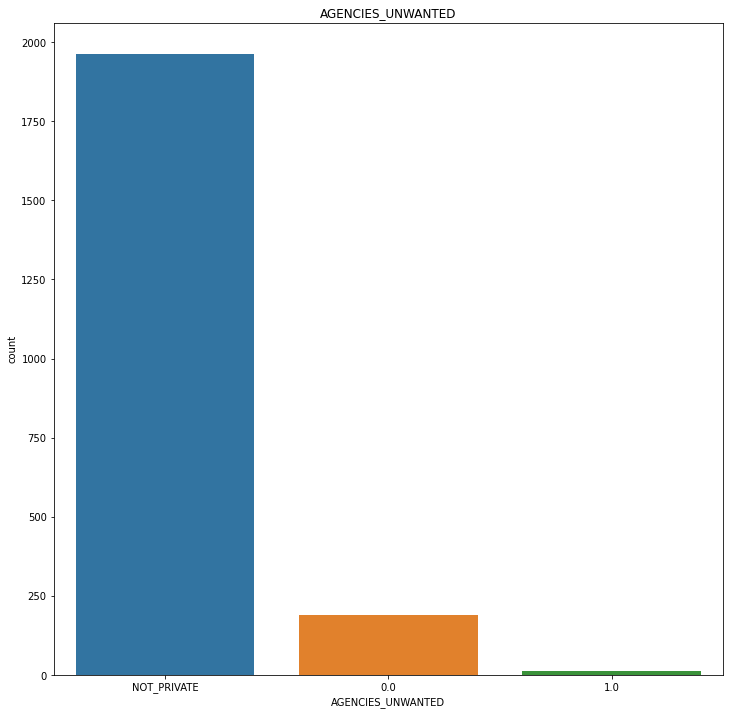

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
sns.countplot(x="AGENCIES_UNWANTED", data=ads_data)
plt.title('AGENCIES_UNWANTED')
plt.show()

## Caretaker

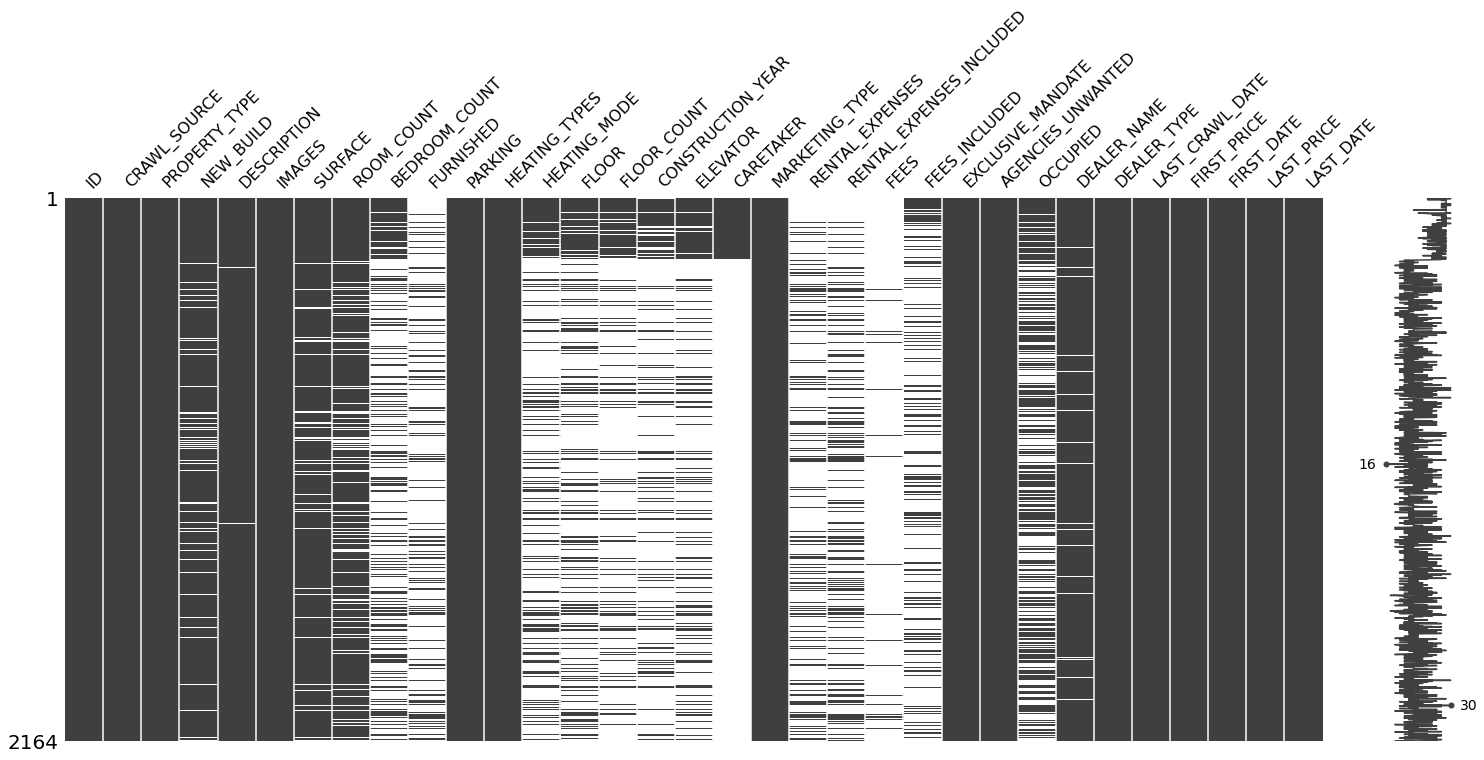

In [ ]:
sorted = ads_data.sort_values('CARETAKER')
msno.matrix(sorted)

NaN values for CARETAKER are npt correlated with any other column.
\
Missing values for this are Missing Completely at Random and have a very high percentage (88.58%). So, we drop it

In [ ]:
ads_data.drop(["CARETAKER"], axis=1, inplace=True)

In [ ]:
sorted = ads_data.sort_values('RENTAL_EXPENSES')
msno.matrix(sorted)

TypeError: ignored

There are few misentered values for RENTAL_EXPENSES of datetime type. We replace them by NaN.

In [ ]:
l1= [x for x in ads_data.index if type(ads_data.loc[x,"RENTAL_EXPENSES"])==datetime.datetime]
for i in l1:
  ads_data.loc[i, "RENTAL_EXPENSES"]=np.nan

When RENTAL_EXPENSES$\ne$NaN, FEES_INCLUDED takes NaN.
\
When FEES_INCLUDED$\ne$NaN, RENTAL_EXPENSES$=$NaN.


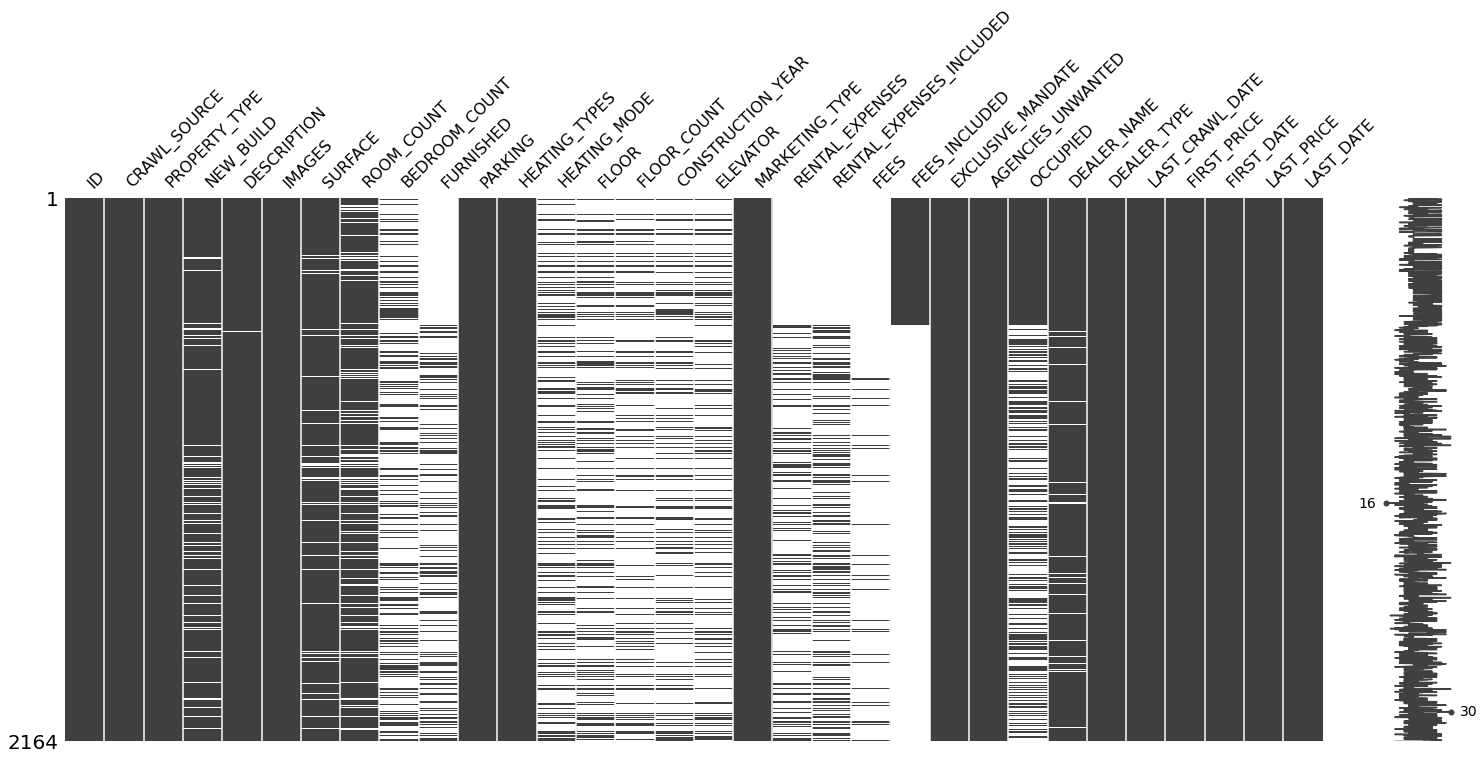

In [ ]:
sorted = ads_data.sort_values('FEES_INCLUDED')
msno.matrix(sorted)

We can create a vraiable called EXPENSES/FEES_INCLUDED which takes:
1. FEES_INCLUDED when FEES_INCLUDED$ne$NaN and RENTAL_EXPENSES_INCLUDED$=$NaN
2. RENTAL_EXPENSES_INCLUDED when RENTAL_EXPENSES_INCLUDED$\ne$NaN and FEES_INCLUDED$=$Nan
2. None if both take NaN

In [ ]:
for i in ads_data.index:
  if ((not (np.isnan(ads_data.loc[i,"FEES_INCLUDED"]))) & (np.isnan(ads_data.loc[i,"RENTAL_EXPENSES_INCLUDED"]))):
    ads_data.loc[i,"EXPENSES/FEES_INCLUDED"]="FEES_INCLUDED"
  if ((not (np.isnan(ads_data.loc[i,"RENTAL_EXPENSES_INCLUDED"]))) & (np.isnan(ads_data.loc[i,"FEES_INCLUDED"]))):
    ads_data.loc[i,"EXPENSES/FEES_INCLUDED"]="RENTAL_EXPENSES_INCLUDED"
  if ((np.isnan(ads_data.loc[i,"RENTAL_EXPENSES_INCLUDED"])) & (np.isnan(ads_data.loc[i,"FEES_INCLUDED"]))):
    ads_data.loc[i,"EXPENSES/FEES_INCLUDED"]=np.nan
ads_data["EXPENSES/FEES_INCLUDED"].fillna("None", inplace=True)

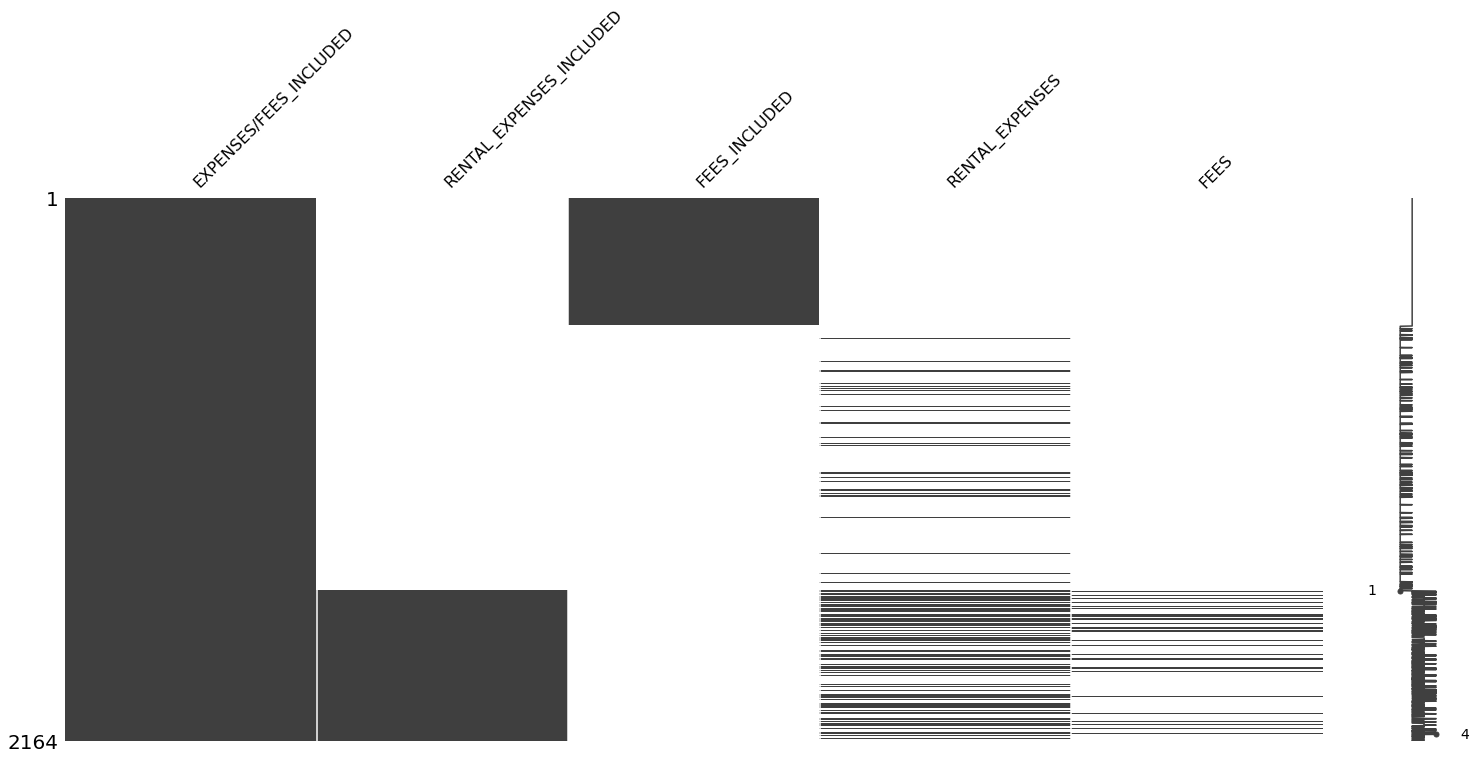

In [ ]:
#on peut vérifier la pertinence de la variable ajoutée
sorted = ads_data[["EXPENSES/FEES_INCLUDED","RENTAL_EXPENSES_INCLUDED","FEES_INCLUDED","RENTAL_EXPENSES","FEES"]].sort_values("EXPENSES/FEES_INCLUDED")
msno.matrix(sorted)

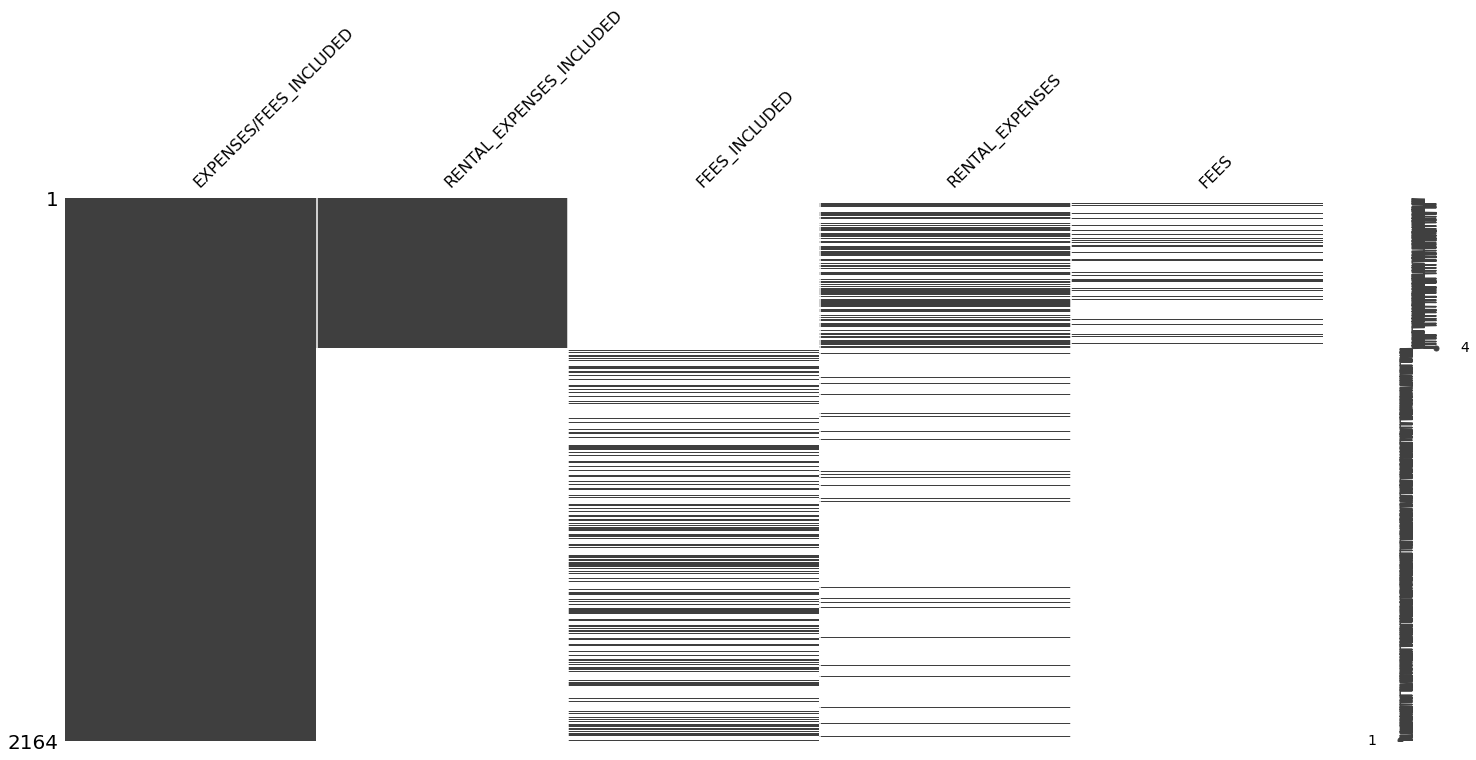

In [ ]:
sorted = ads_data[["EXPENSES/FEES_INCLUDED","RENTAL_EXPENSES_INCLUDED","FEES_INCLUDED","RENTAL_EXPENSES","FEES"]].sort_values("RENTAL_EXPENSES_INCLUDED")
msno.matrix(sorted)

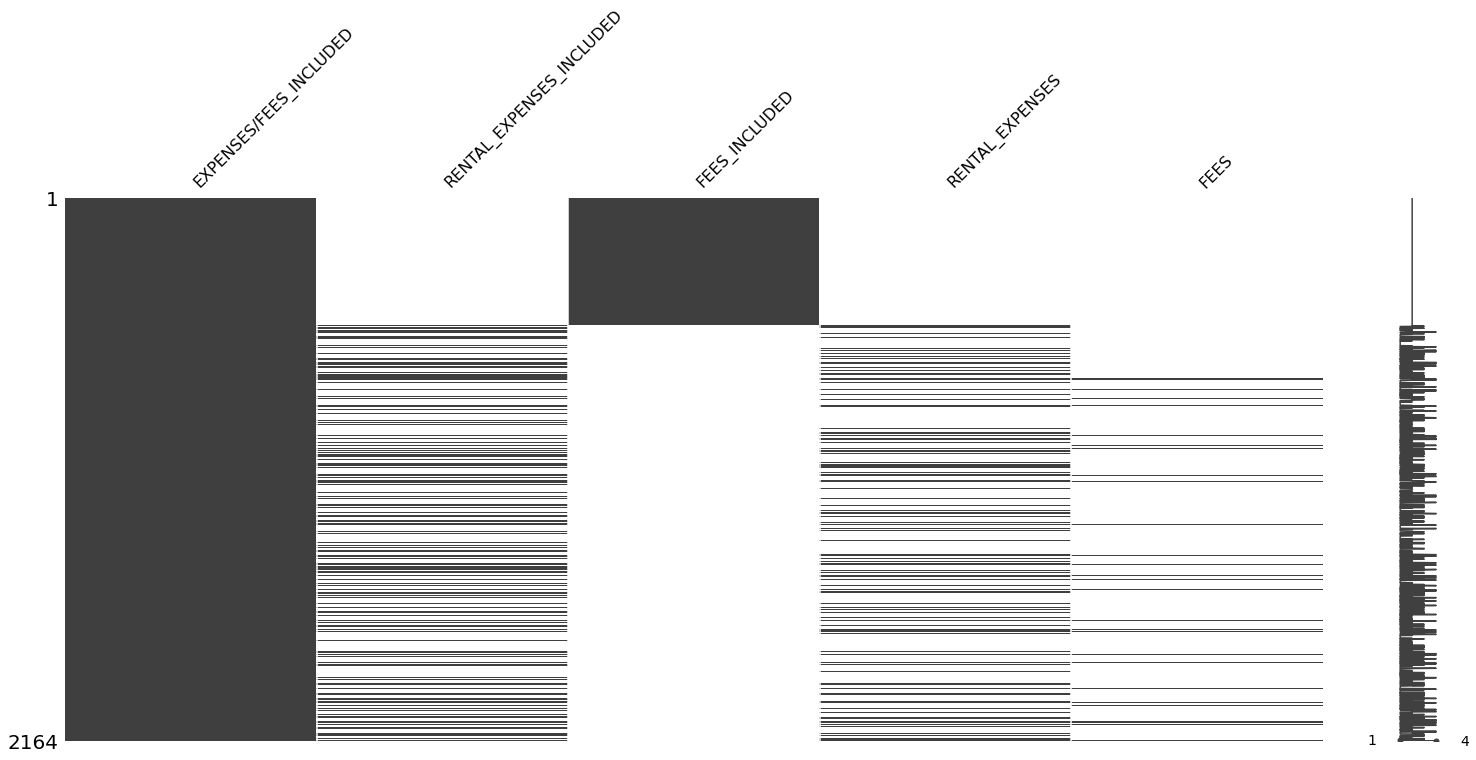

In [ ]:
sorted = ads_data[["EXPENSES/FEES_INCLUDED","RENTAL_EXPENSES_INCLUDED","FEES_INCLUDED","RENTAL_EXPENSES","FEES"]].sort_values("FEES_INCLUDED")
msno.matrix(sorted)

In [ ]:
ads_data["FEES"].value_counts().head(20)

299.00     4
662.55     4
465.00     3
150.00     3
823.50     3
405.00     2
378.00     2
806.70     2
525.00     2
765.00     2
780.00     2
100.00     2
9720.00    2
29.50      2
120.00     2
675.00     2
1065.00    1
250.00     1
447.00     1
876.00     1
Name: FEES, dtype: int64

In [ ]:
ads_data["RENTAL_EXPENSES"].value_counts().head(20)

100.00    49
50.00     25
80.00     21
70.00     15
130.00    15
150.00    14
140.00    13
60.00     12
15.00     12
10.00      9
110.00     8
250.00     8
85.00      8
20.00      8
40.00      7
200.00     7
105.00     7
120.00     7
90.00      6
30.00      6
Name: RENTAL_EXPENSES, dtype: int64

FEES contain many NaN values and dpes not have enough values to characterize entries.

RENTAL_EXPENSES can be an important variable, even with a high NaN percentage. We replace NaN values in RENTAL_EXPENSES and EXPENSES/FEES_INCLUDED by None.
\
Then, we drop the columns RENTAl_EXPENSES_INCLUDED and FEES_INCLUDED.

In [ ]:
for i in ads_data[ads_data["FEES_INCLUDED"].notnull()].index:
  ads_data.loc[i, "RENTAL_EXPENSES"]="NO_EXPENSES"
ads_data["RENTAL_EXPENSES"].fillna("None", inplace=True)
ads_data.drop(["RENTAL_EXPENSES_INCLUDED", "FEES_INCLUDED","FEES"], axis=1, inplace=True)
ads_data[["EXPENSES/FEES_INCLUDED"]].fillna("None", inplace=True)
ads_data["RENTAL_EXPENSES"].fillna("None", inplace=True,axis=0)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


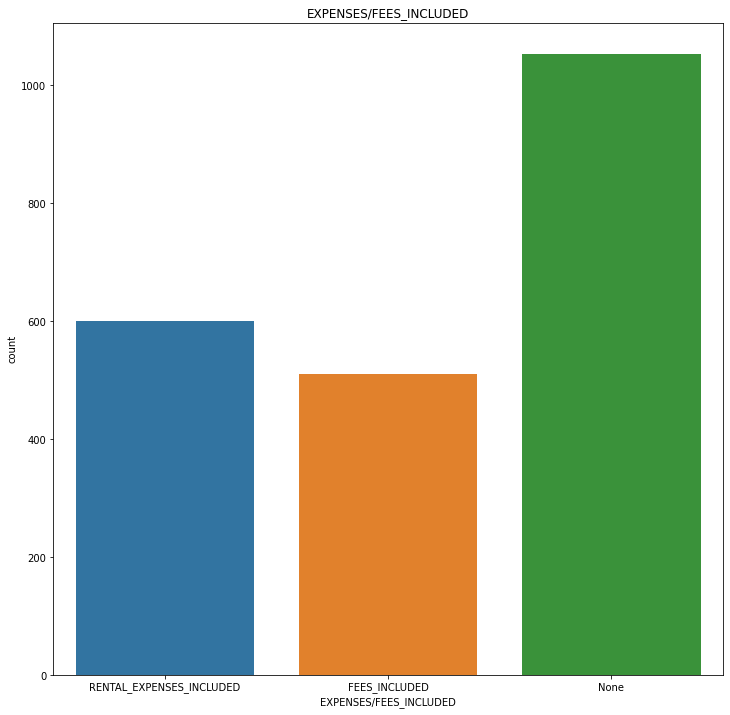

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
sns.countplot(x="EXPENSES/FEES_INCLUDED", data=ads_data)
plt.title("EXPENSES/FEES_INCLUDED")
plt.show()

FLOOR_COUNT characterizes the number of floors when there is an appartment (in the building where the appartment is located).
\
All FLOOR_COUNT$\ne$NaN entries are relative to APARTEMENT.

In [ ]:
#FLOOR_COUNT!=NaN
ads_data[ads_data["FLOOR_COUNT"].notnull()]["PROPERTY_TYPE"].value_counts()

APARTMENT    465
Name: PROPERTY_TYPE, dtype: int64

In [ ]:
#FLOOR_COUNT==NaN
ads_data[ads_data["FLOOR_COUNT"].isnull()]["PROPERTY_TYPE"].value_counts()

APARTMENT    971
PREMISES     479
PARKING      188
HOUSE         52
BUILDING       9
Name: PROPERTY_TYPE, dtype: int64

FOr the entries with PROPERTY_TYPE$\ne$APARTMENT, FLOOR_COUNT NaNs are replaced by NO_FLOOR. For the APARTMENT entries, we replace NaNs by None.
\
The same is done with FLOOR. It's a variable which characterizes the floor number.

In [ ]:
for i in ads_data[ads_data["FLOOR_COUNT"].isnull()].index:
  if ads_data.loc[i,"PROPERTY_TYPE"]!="APARTMENT":
    ads_data.loc[i,"FLOOR_COUNT"]="NO_FLOOR"
  else:
    ads_data.loc[i,"FLOOR_COUNT"]="None"

for i in ads_data[ads_data["FLOOR"].isnull()].index:
  if ads_data.loc[i,"PROPERTY_TYPE"]!="APARTMENT":
    ads_data.loc[i,"FLOOR"]="NO_FLOOR"
  else:
    ads_data.loc[i,"FLOOR"]="None"

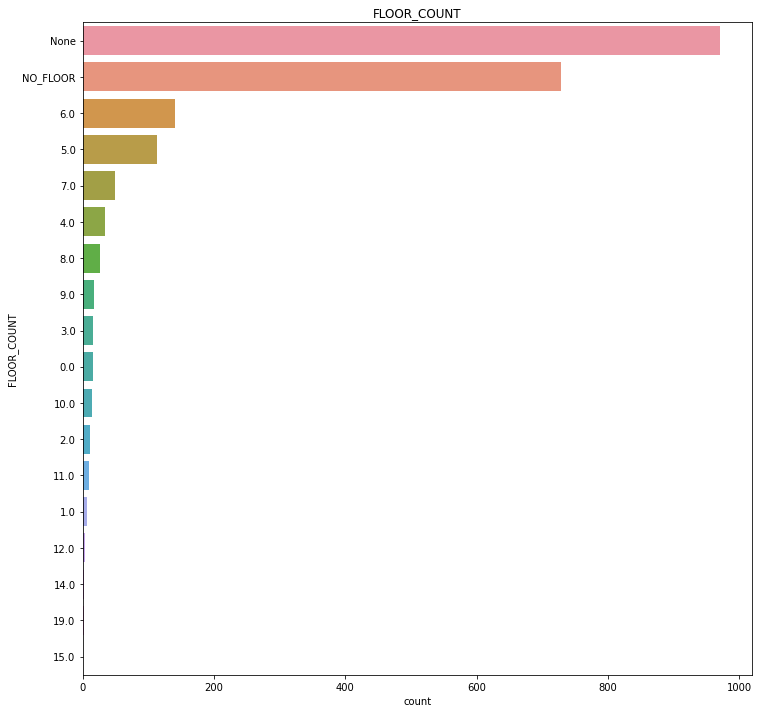

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
sns.countplot(y="FLOOR_COUNT", data=ads_data, order = ads_data['FLOOR_COUNT'].value_counts().index)
plt.title("FLOOR_COUNT")
plt.show()

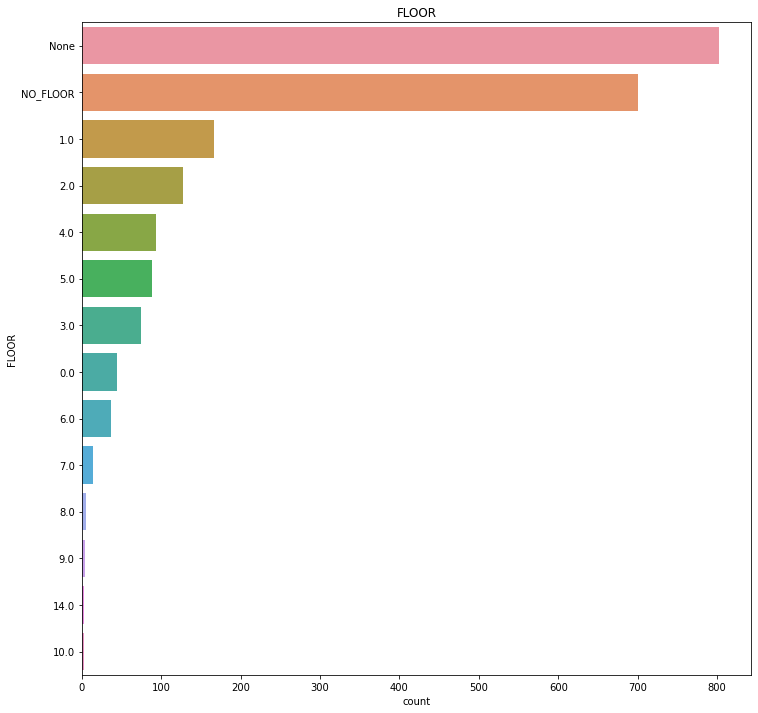

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
sns.countplot(y="FLOOR", data=ads_data, order = ads_data['FLOOR'].value_counts().index)
plt.title("FLOOR")
plt.show()

We analyze NaN values for OCCUPIED, FURNISHED and OCCUPIED

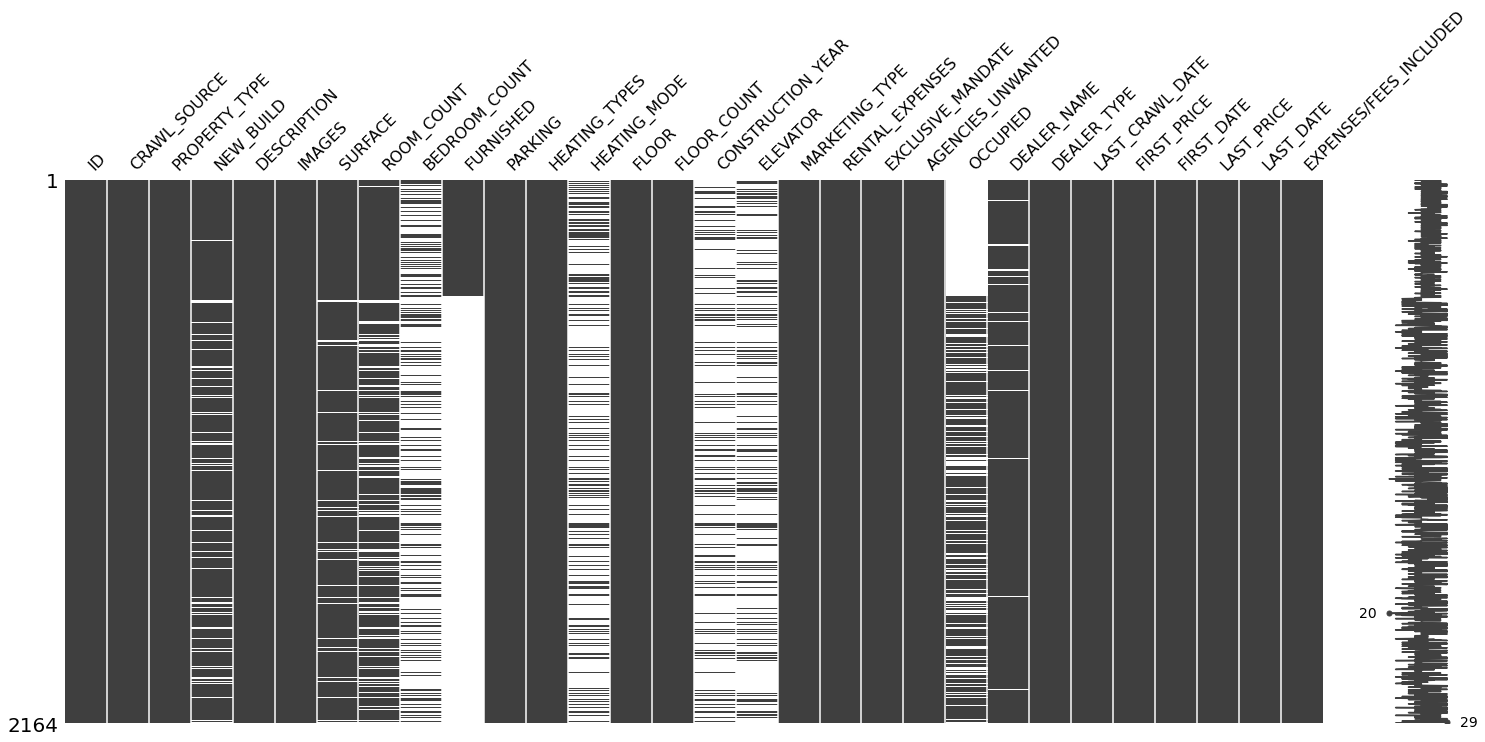

In [ ]:
sorted = ads_data.sort_values("FURNISHED")
msno.matrix(sorted)

When FURNISHED takes a value $\ne$ NaN, OCCUPIED takes NaN.
\
We can replace these values of OCCUPIED by FURNISHED. The rest of the values are missing and replaced by None.

In [ ]:
for i in ads_data[ads_data["FURNISHED"].notnull()].index:
  ads_data.loc[i,"OCCUPIED"]="FURNISHED"
ads_data["OCCUPIED"].fillna("None", inplace=True)

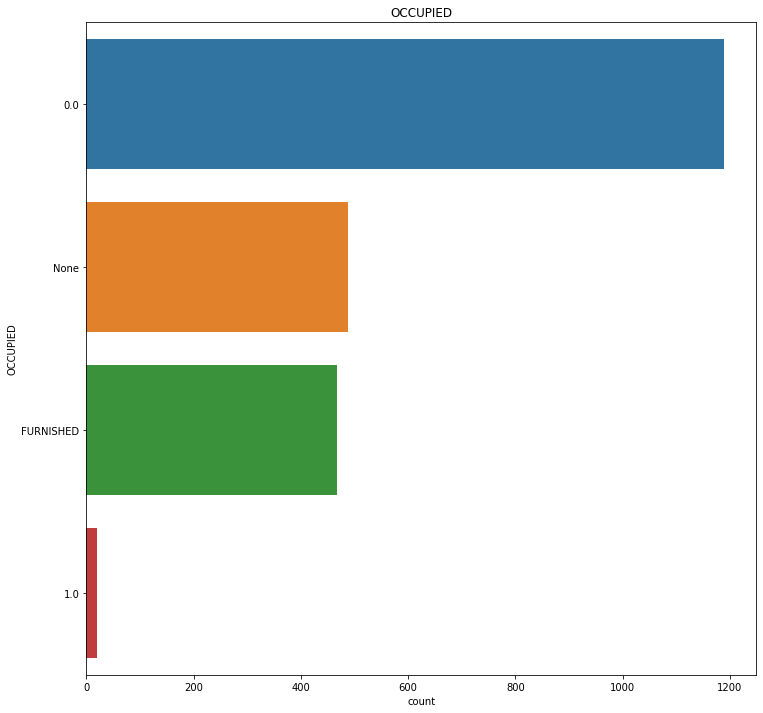

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
sns.countplot(y="OCCUPIED", data=ads_data, order = ads_data['OCCUPIED'].value_counts().index)
plt.title("OCCUPIED")
plt.show()

FURNISHED and CONSTRUCTION_YEAR have too many NaNs, so we drop them.

In [ ]:
ads_data.drop(["FURNISHED"], inplace=True, axis=1)
ads_data.drop(["CONSTRUCTION_YEAR"],axis=1, inplace=True)

In [ ]:
ads_data[ads_data["NEW_BUILD"].isnull()]["PROPERTY_TYPE"].value_counts()

PARKING      188
APARTMENT      3
Name: PROPERTY_TYPE, dtype: int64

In [ ]:
ads_data[ads_data["NEW_BUILD"].notnull()]["PROPERTY_TYPE"].value_counts()

APARTMENT    1433
PREMISES      479
HOUSE          52
BUILDING        9
Name: PROPERTY_TYPE, dtype: int64

Entries with PROPERTY_TYPE=PARKING have NEW_BUILD=NaN. We can replace NEW_BUILD when when PROPERTY_TYPE=PARKING by NO_BUILD.
\
The rest of NaNs are replaced by None.

In [ ]:
for i in ads_data[ads_data["PROPERTY_TYPE"]=="PARKING"].index:
  ads_data.loc[i, "NEW_BUILD"]="NO_BUILD"
ads_data["NEW_BUILD"].fillna("None", inplace=True)

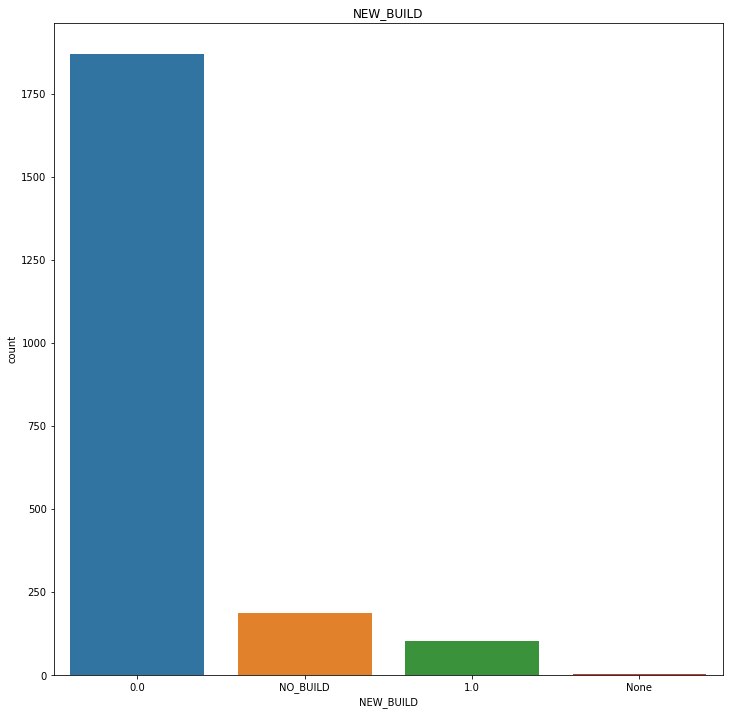

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
sns.countplot(x="NEW_BUILD", data=ads_data, order = ads_data['NEW_BUILD'].value_counts().index)
plt.title("NEW_BUILD")
plt.show()

For the variable ROOM_COUNT:

In [ ]:
ads_data[ads_data["ROOM_COUNT"].isnull()]["PROPERTY_TYPE"].value_counts()

PARKING      188
PREMISES     113
APARTMENT     14
BUILDING       9
HOUSE          5
Name: PROPERTY_TYPE, dtype: int64

In [ ]:
ads_data[ads_data["ROOM_COUNT"].notnull()]["PROPERTY_TYPE"].value_counts()

APARTMENT    1422
PREMISES      366
HOUSE          47
Name: PROPERTY_TYPE, dtype: int64

Al entries with PROPERTY_TYPE = PARKING or BUILDING doon' have ROOM_COUNT values. we replace these NaNs by NO_ROOMS.
\
The rest are replaced by None.  

In [ ]:
for i in ads_data[(ads_data["PROPERTY_TYPE"]=="PARKING") | (ads_data["PROPERTY_TYPE"]=="BUILDING") ].index:
  ads_data.loc[i, "ROOM_COUNT"]="NO_ROOM"
ads_data["ROOM_COUNT"].fillna("None", inplace=True)

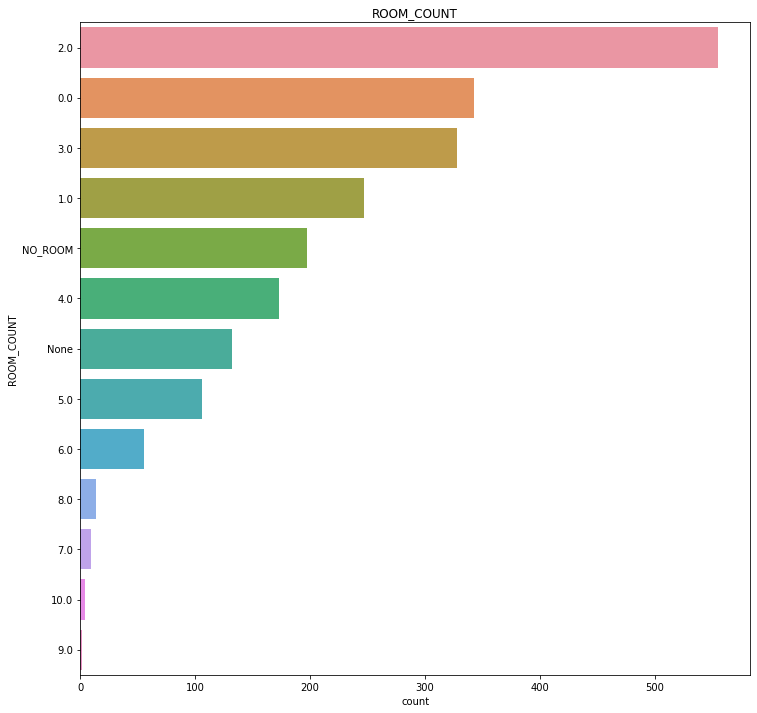

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
sns.countplot(y="ROOM_COUNT", data=ads_data, order = ads_data['ROOM_COUNT'].value_counts().index)
plt.title("ROOM_COUNT")
plt.show()

BEDROOM_COUNT contains too much NaN for APARTMENT and HOUSE entries. We drop it.

In [ ]:
ads_data[ads_data["BEDROOM_COUNT"].notnull()]["PROPERTY_TYPE"].value_counts()

APARTMENT    667
HOUSE         25
PREMISES       4
Name: PROPERTY_TYPE, dtype: int64

In [ ]:
ads_data[ads_data["BEDROOM_COUNT"].isnull()]["PROPERTY_TYPE"].value_counts()

APARTMENT    769
PREMISES     475
PARKING      188
HOUSE         27
BUILDING       9
Name: PROPERTY_TYPE, dtype: int64

In [ ]:
ads_data.drop(["BEDROOM_COUNT"], axis=1, inplace=True)

We delete HEATING_MODE and HEATING_TYPE because they contain too many NaNs eand are not specific enough for the different entries.

In [ ]:
ads_data.drop(["HEATING_MODE",'HEATING_TYPES'], axis=1, inplace=True)

For the variable description, it is important to check whether annoucements are regrouped by description.

In [ ]:
#créer une liste pour les descriptions uniques (différntes)
s=set(ads_data[ads_data["DESCRIPTION"].notnull()]["DESCRIPTION"].values)
descriptions=[x for x in s]
len(descriptions)

1914

We have a total of 1915 unique desciptions.
\
It's a bad criteria to characterize the different announcements. There are also repeated announcements which are specific to different real estate properties; for example the same announcement for differnet appartments of the same owner or same building. That's why it's better to drop it. The same goes with IMAGES variable.

In [ ]:
ads_data.drop(["DESCRIPTION", "IMAGES"], axis=1, inplace=True)

The variable ELEVATOR is deleted because it contains many NaNs and doesn't serve to distinguish between different annoucements. 

In [ ]:
ads_data.drop(["ELEVATOR"], axis=1, inplace=True)

For the th other variables with very low NaN percentage (SURFACE, DEALER_NAME), we simply replace NaN by None.


In [ ]:
ads_data["SURFACE"].fillna("None", inplace=True)
ads_data["DEALER_NAME"].fillna("None", inplace=True)

Each variable specific to a date is transformed into 3 variables DAY, MONTH et YEAR to facilitate the ditinction between samples.

In [ ]:
ads_data['YEAR_LAST'] = pd.DatetimeIndex(ads_data['LAST_DATE']).year
ads_data['MONTH_LAST'] = pd.DatetimeIndex(ads_data['LAST_DATE']).month
ads_data['DAY_LAST'] = pd.DatetimeIndex(ads_data['LAST_DATE']).day

ads_data['YEAR_LAST_CRAWL'] = pd.DatetimeIndex(ads_data['LAST_CRAWL_DATE']).year
ads_data['MONTH_LAST_CRAWL'] = pd.DatetimeIndex(ads_data['LAST_CRAWL_DATE']).month
ads_data['DAY_LAST_CRAWL'] = pd.DatetimeIndex(ads_data['LAST_CRAWL_DATE']).day

ads_data['YEAR_FIRST'] = pd.DatetimeIndex(ads_data['FIRST_DATE']).year
ads_data['MONTH_FIRST'] = pd.DatetimeIndex(ads_data['FIRST_DATE']).month
ads_data['DAY_FIRST'] = pd.DatetimeIndex(ads_data['FIRST_DATE']).day

ads_data.drop(['FIRST_DATE','LAST_DATE', 'LAST_CRAWL_DATE'], axis=1, inplace=True)

We verify if columns don't contain anymore NaNs

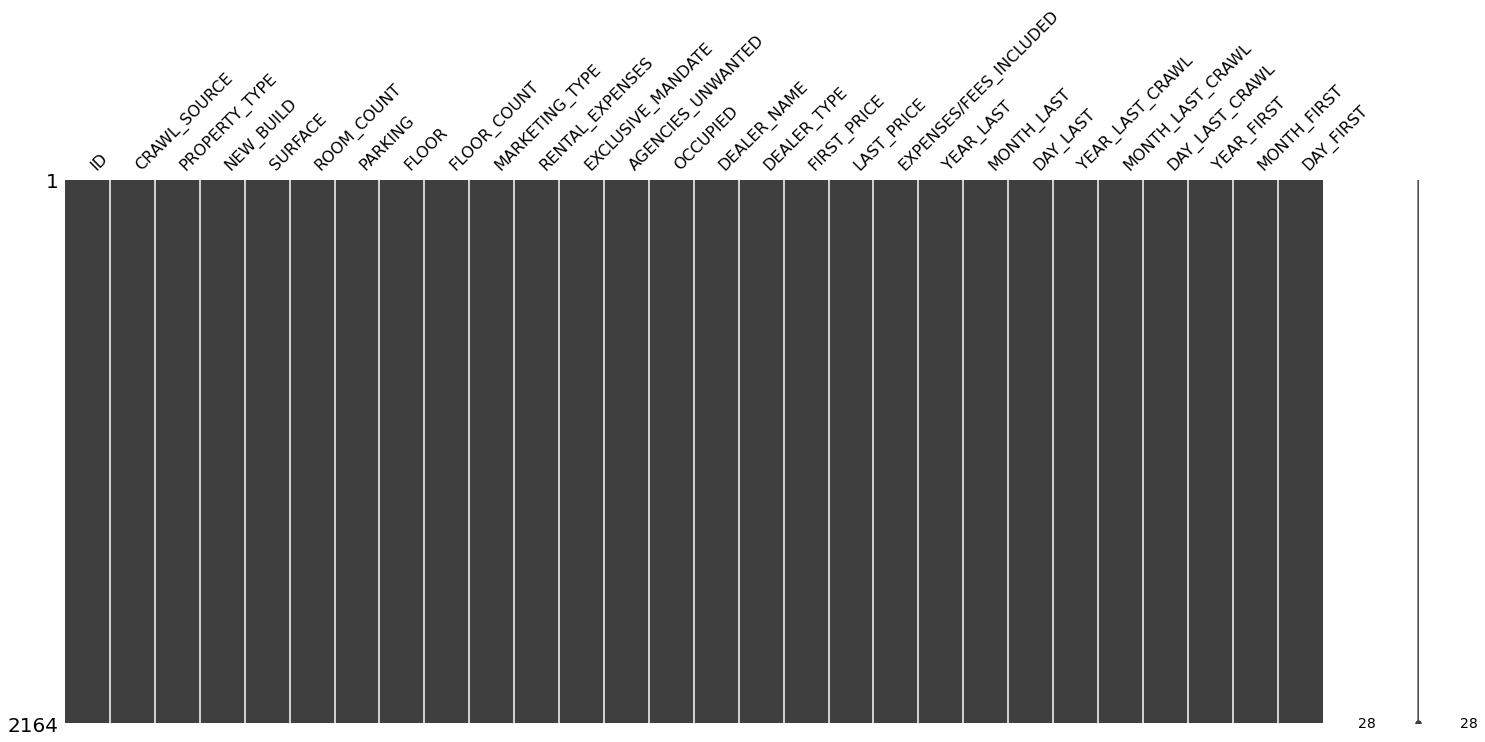

In [ ]:
msno.matrix(ads_data)

In [ ]:
ads_data.to_csv("/ads_data.csv")

In [ ]:
ads_data=pd.read_csv("/ads_data.csv",).drop(["Unnamed: 0"], axis=1)

RENTAL_EXPENSES is continious but contains many NaNs; it's better to delete it.

In [ ]:
ads_data.drop( ["RENTAL_EXPENSES"], axis=1, inplace=True)

We distinguish between categorical variables (nominal and ordinal) and continious variables.

In [ ]:
nominal_categorical_variables=['CRAWL_SOURCE', 'PROPERTY_TYPE', 'PARKING',
       'MARKETING_TYPE', 'EXCLUSIVE_MANDATE', 'AGENCIES_UNWANTED',
       'DEALER_NAME', 'DEALER_TYPE','NEW_BUILD','OCCUPIED','EXPENSES/FEES_INCLUDED']
ordinal_categorical_variables=[ 'ROOM_COUNT', 'YEAR_LAST',
       'MONTH_LAST', 'DAY_LAST', 'YEAR_LAST_CRAWL', 'MONTH_LAST_CRAWL',
       'DAY_LAST_CRAWL', 'YEAR_FIRST', 'MONTH_FIRST', 'DAY_FIRST','FLOOR', 'FLOOR_COUNT']

numerical_variables=["LAST_PRICE","FIRST_PRICE", "SURFACE"]
for col in numerical_variables:
  for i in range(len(ads_data)):
    try:
      ads_data.loc[i,col]=float(ads_data.loc[i,col])
    except:
      continue
ads_data[ordinal_categorical_variables]=ads_data[ordinal_categorical_variables].astype(str)

We calculate the occrences of None in each columns

In [ ]:
def count_None(data, column):
  unique_values=set(data[column].values)
  if "None" in unique_values:
    return(data[column].value_counts()["None"])
  else:
    return(0)

In [ ]:
None_data=pd.DataFrame()
for col in ads_data.columns:
  None_data.loc[col, "Number of 'None's"]=count_None(ads_data, col)

In [ ]:
None_data.sort_values(by="Number of 'None's", ascending=False)

,Number of 'None's
EXPENSES/FEES_INCLUDED,1053.0
FLOOR_COUNT,971.0
FLOOR,803.0
OCCUPIED,488.0
ROOM_COUNT,132.0
SURFACE,114.0
DEALER_NAME,87.0
NEW_BUILD,3.0
MONTH_FIRST,0.0
YEAR_FIRST,0.0


We apply data normalization on the variables FIRST_PRICE, LAST_PRICE, SURFACE. Since our data is not distributed according to a normal/gaussian distribution (aacording to the previous plots), applying Standard Scaler can lead to unpleasant results.

In [ ]:
for col in numerical_variables:
  indexes=[]
  for i in ads_data.index:
    if (ads_data.loc[i,col]!="None"):
      indexes.append(i)
  df=ads_data.loc[indexes, :]
  try:
    col_min= float(min(df[col]))
  except:
    print(col)
  col_max= float(max(df[col]))
  ads_data.loc[indexes, col]=(ads_data.loc[indexes, col]-col_min)/(col_max - col_min)

In [ ]:
ads_data_withNaN=ads_data.copy()

We can try to replace SURFACE, DEALER_NAME and NEW_BUILD values.
\
The rest just have too many NaNs to predict.
\
We can use KNN to predict the mossing values.

We begin by the variable NEW_BUILD because it contains only 3 missing values.

In [ ]:
ads_datad=ads_data.drop(["ID","EXPENSES/FEES_INCLUDED","FLOOR_COUNT","FLOOR", "OCCUPIED","DEALER_NAME","ROOM_COUNT","SURFACE"], axis=1)
ads_data2=ads_datad[ads_datad["NEW_BUILD"]!="None"]
ads_data3=ads_datad[ads_datad["NEW_BUILD"]=="None"]

Since NEW_BUILD is categorical, we use KNN classifier.
\
First, categorical variables are encoded:
1. The ordinal categorical variables are encoded by label encoding: each variable is associated to a column.
2. Nominal categorical variables are encoded by one-hot encoding: each variable is associated to $N_{variable}$ columns, $N_{variable}$ beaing the number of possible values taken by that variable.ssibles de cette variable.
\
Then, we train the KNN on entries with NEW_BUILD $\ne$ "None", in order to predict the ones with NEW_BUILD = "None".
\
P.S: For the train, we consider only the entries with no NaN values for each variable.

In [ ]:
ords_to_use=[x for x in (set(ordinal_categorical_variables) - set(["FLOOR_COUNT","FLOOR","ROOM_COUNT"]))]
nomins_to_use=[x for x in (set(nominal_categorical_variables) - set(["EXPENSES/FEES_INCLUDED","OCCUPIED","NEW_BUILD","DEALER_NAME",""]))]
numerics_to_use=[x for x in (set(numerical_variables)) - set(["SURFACE"]) ]

le = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
ads_data_encoded=ads_datad.loc[:,ords_to_use].apply(le.fit_transform)
ads_data_encoded2=pd.get_dummies(ads_datad.loc[:,nomins_to_use])
ads_data_encoded3 = pd.concat([ads_data_encoded, ads_data_encoded2, ads_datad.loc[:,numerics_to_use]], axis=1)
knnc = KNeighborsClassifier(n_neighbors=10)
X=ads_data_encoded3.loc[ads_data2.index,:]
X_to_predict=ads_data_encoded3.loc[ads_data3.index,:]
y=le2.fit_transform(ads_data2[["NEW_BUILD"]])
knnc.fit(X, y)
Y_predicted=knnc.predict(X_to_predict)
le2_name_mapping = dict(zip(le2.transform(le2.classes_), le2.classes_ ))
ads_data.loc[ads_data3.index,"NEW_BUILD"]=[le2_name_mapping[x] for x in Y_predicted]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The same is done for DEALER_NAME

In [ ]:
ads_datad=ads_data.drop(["ID","EXPENSES/FEES_INCLUDED","FLOOR_COUNT","FLOOR", "OCCUPIED","ROOM_COUNT","SURFACE"], axis=1)
ads_data2=ads_datad[ads_datad["DEALER_NAME"]!="None"]
ads_data3=ads_datad[ads_datad["DEALER_NAME"]=="None"]

In [ ]:
len(ads_data2)

2077

In [ ]:
ords_to_use=[x for x in (set(ordinal_categorical_variables) - set(["FLOOR_COUNT","FLOOR","ROOM_COUNT"]))]
nomins_to_use=[x for x in (set(nominal_categorical_variables) - set(["EXPENSES/FEES_INCLUDED","OCCUPIED","DEALER_NAME"]))]
numerics_to_use=[x for x in (set(numerical_variables) ) - set(["SURFACE"]) ]

le = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
ads_data_encoded=ads_datad.loc[:,ords_to_use].apply(le.fit_transform)
ads_data_encoded2=pd.get_dummies(ads_datad.loc[:,nomins_to_use])
ads_data_encoded3 = pd.concat([ads_data_encoded, ads_data_encoded2, ads_datad.loc[:,numerics_to_use]], axis=1)
knnc = KNeighborsClassifier(n_neighbors=10)
X=ads_data_encoded3.loc[ads_data2.index,:]
X_to_predict=ads_data_encoded3.loc[ads_data3.index,:]
y=le2.fit_transform(ads_data2[["DEALER_NAME"]])
knnc.fit(X, y)
Y_predicted=knnc.predict(X_to_predict)
le2_name_mapping = dict(zip(le2.transform(le2.classes_), le2.classes_ ))
ads_data.loc[ads_data3.index,"DEALER_NAME"]=[le2_name_mapping[x] for x in Y_predicted]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Since SURFACE is nmerical (continious), we use KNeighborsRegressor (regression for KNN).

In [ ]:
ads_datad=ads_data.drop(["ID","EXPENSES/FEES_INCLUDED","FLOOR_COUNT","FLOOR", "OCCUPIED","SURFACE"], axis=1)
ads_data2=ads_datad[ads_datad["ROOM_COUNT"]!="None"]
ads_data3=ads_datad[ads_datad["ROOM_COUNT"]=="None"]

In [ ]:
ords_to_use=[x for x in (set(ordinal_categorical_variables) - set(["FLOOR_COUNT","FLOOR","ROOM_COUNT"]))]
nomins_to_use=[x for x in (set(nominal_categorical_variables) - set(["EXPENSES/FEES_INCLUDED","OCCUPIED"]))]
numerics_to_use=[x for x in (set(numerical_variables)) - set(["SURFACE"])]


le = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
ads_data_encoded=ads_datad.loc[:,ords_to_use].apply(le.fit_transform)
ads_data_encoded2=pd.get_dummies(ads_datad.loc[:,nomins_to_use])
ads_data_encoded3 = pd.concat([ads_data_encoded, ads_data_encoded2, ads_datad.loc[:,numerics_to_use]], axis=1)
knnc = KNeighborsClassifier(n_neighbors=10)
X=ads_data_encoded3.loc[ads_data2.index,:]
X_to_predict=ads_data_encoded3.loc[ads_data3.index,:]
y=le2.fit_transform(ads_data2[["ROOM_COUNT"]])
knnc.fit(X, y)
Y_predicted=knnc.predict(X_to_predict)
le2_name_mapping = dict(zip(le2.transform(le2.classes_), le2.classes_ ))
ads_data.loc[ads_data3.index,"ROOM_COUNT"]=[le2_name_mapping[x] for x in Y_predicted]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
ads_datad=ads_data.drop(["ID","EXPENSES/FEES_INCLUDED","FLOOR_COUNT","FLOOR", "OCCUPIED"], axis=1)
ads_data2=ads_datad[ads_datad["SURFACE"]!="None"]
ads_data3=ads_datad[ads_datad["SURFACE"]=="None"]

In [ ]:
ords_to_use=[x for x in (set(ordinal_categorical_variables) - set(["FLOOR_COUNT","FLOOR"]))]
nomins_to_use=[x for x in (set(nominal_categorical_variables) - set(["EXPENSES/FEES_INCLUDED","OCCUPIED"]))]
numerics_to_use=[x for x in (set(numerical_variables)) - set(["SURFACE"])]


le = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
ads_data_encoded=ads_datad.loc[:,ords_to_use].apply(le.fit_transform)
ads_data_encoded2=pd.get_dummies(ads_datad.loc[:,nomins_to_use])
ads_data_encoded3 = pd.concat([ads_data_encoded, ads_data_encoded2, ads_datad.loc[:,numerics_to_use]], axis=1)
knnr =KNeighborsRegressor(n_neighbors=10)
X=ads_data_encoded3.loc[ads_data2.index,:]
X_to_predict=ads_data_encoded3.loc[ads_data3.index,:]
y=ads_data2[["SURFACE"]]
knnr.fit(X, y)
Y_predicted=knnr.predict(X_to_predict)
ads_data.loc[ads_data3.index,"SURFACE"]=Y_predicted

Now, we have replaced the possible NaN values. The rest of the variables have too much NaNs to be predicted (even if we train KNN on non missing data to predict missing ones we will get misleading results because the missing values have an importance weight)

For the clustering, we will use a variant of the k-means algorithm called k-modes which allow to use a mix of categorical and continious variables.

In [ ]:
data=ads_data.drop(['ID'], axis=1)

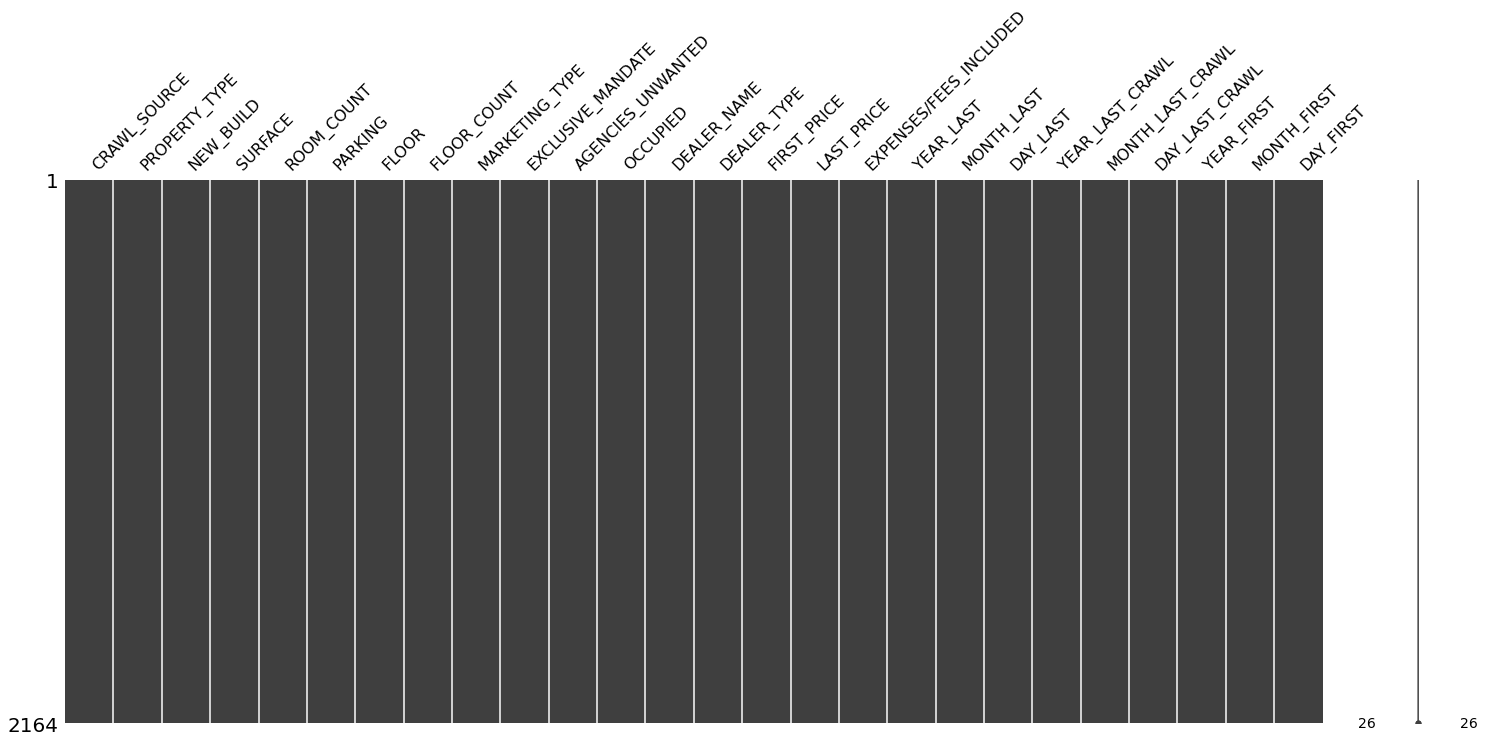

In [ ]:
msno.matrix(data)

We initialize the kmodes model and observe the error (distance) for a number of clusters from 100 to 800. We use a s step of 8 to accelerate the computation (100, 108, 116,...)

In [ ]:
costs= []

!pip install kmodes
from kmodes.kmodes import KModes
kmodes_kwargs = {"init": "Huang",
                 "n_init": 10,
                 "max_iter": 1000,
                 "random_state": 30,
                 "verbose":0}
for k in range(100, 800,8):
   km = KModes(n_clusters=k, **kmodes_kwargs)
   clusters=km.fit_predict(data)
   costs.append(km.cost_)

KeyboardInterrupt: ignored

The process was interrupted after hours of training because it took so long.

In [ ]:
len(costs)

60

We can see that we have stopped at 60 iteration which means 100 + 60*8 = 580 clusters

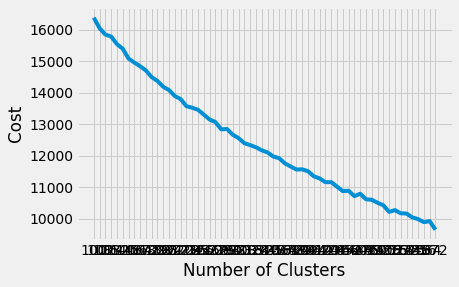

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(100, 580,8), costs)
plt.xticks(range(100, 580,8))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.show()

What is the optimal number of clusters? (the number of unique annoucements without redundencies)

In [ ]:
!pip install kneed
from kneed import  KneeLocator
kl = KneeLocator(range(100, 580,8), costs, curve="convex", direction="decreasing")
kl.elbow

276

According to the elbow method, the optimal number of clusters is 276. 

In [ ]:
km = KModes(n_clusters=276, init='Huang', n_init=10, verbose=0, random_state=30, max_iter=1000)
clusters = km.fit_predict(data)

We reconstruct our original datafame and add a columns containing the corresponding cluster for each entry.
\
Then, we pick a random cluster number and rty to check is the entries belong (or almost) to the same announcement

In [ ]:
original_data=ads_data=pd.read_excel("/content/drive/MyDrive/Dataset - Ads _ Levallois-Perret - 2019-08.xlsx")
clustersDf = pd.DataFrame(clusters)
clustersDf.columns = ['Cluster_predicted']
data_with_clusters = pd.concat([original_data, clustersDf], axis = 1)

In [ ]:
#a random cluster
n=randint(0,276)
print(n)
data_with_clusters[data_with_clusters['Cluster_predicted']==n]

20


,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,LAND_SURFACE,BALCONY_SURFACE,TERRACE_SURFACE,ROOM_COUNT,BEDROOM_COUNT,BATHROOM_COUNT,LUNCHROOM_COUNT,TOILET_COUNT,FURNISHED,FIREPLACE,AIR_CONDITIONING,GARDEN,SWIMMING_POOL,BALCONY,TERRACE,CELLAR,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,ENERGY_CONSUMPTION,GREENHOUSE_GAS_CONSUMPTION,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,PUBLICATION_END_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE,Cluster_predicted
13,8529c9b0-b4ec-11e8-96a3-b14e4af48faf,https://immobilier.lefigaro.fr/annonces/annonc...,EXPLORIMMO,APARTMENT,0.0,LEVALLOIS - MAIRIE - 4 PIECES Appartement 4 pi...,"[""http://photo3.pericles.fr/photo_get.php?S1=3...",66.27,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SALE,560000.0,8450.28,"[{""price"":635000.0,""date"":""2018-09-10""},{""pric...",NaN,NaN,NaN,NaN,0.0,False,NaN,0.0,Building Partners,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-09-10T11:27:36.988,NaN,2019-07-17T20:54:39.983,2019-07-17,20
135,62b06d10-a363-11e9-aa5e-8b8909b4f047,https://immobilier.lefigaro.fr/annonces/annonc...,EXPLORIMMO,APARTMENT,0.0,LEVALLOIS / LOUISE MICHEL A deux pas du métro ...,"[""http://photo3.pericles.fr/photo_get.php?S1=3...",119.65,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SALE,1260000.0,10530.71,"[{""price"":1260000.0,""date"":""2019-07-10""}]",NaN,NaN,NaN,NaN,0.0,False,NaN,0.0,Building Partners,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-07-10T22:38:04.062,NaN,2019-08-17T04:11:20.726,NaT,20
410,61165570-a2fd-11e9-96d9-fb3253f8fc6c,https://www.bienici.com/annonce/pericles-25663570,BIEN_ICI,APARTMENT,0.0,LEVALLOIS / GREFFULHE Appartement 5 pièces de ...,"[""http://photo3.pericles.fr/photo_get.php?S1=3...",115.00,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],COLLECTIVE,6.0,10.0,1995.0,1.0,1.0,NaN,NaN,SALE,1445000.0,12565.22,"[{""price"":1445000.0,""date"":""2019-07-10""}]",NaN,NaN,NaN,NaN,0.0,False,NaN,0.0,Building Partners,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-07-09T22:37:03.476,NaN,2019-08-17T04:41:41.626,NaT,20
483,3a024a50-a29b-11e9-96d9-fb3253f8fc6c,https://immobilier.lefigaro.fr/annonces/annonc...,EXPLORIMMO,APARTMENT,0.0,LEVALLOIS / GREFFULHE Appartement 5 pièces de ...,"[""https://pix.yanport.com/ads/3a024a50-a29b-11...",115.00,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SALE,1445000.0,12565.22,"[{""price"":1445000.0,""date"":""2019-07-09""}]",NaN,NaN,NaN,NaN,0.0,False,NaN,0.0,Building Partners,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-07-09T22:35:31.64,NaN,2019-08-16T00:44:35.282,NaT,20
605,c46d8a80-9db7-11e9-ab3e-47ec2b68d334,https://immobilier.lefigaro.fr/annonces/annonc...,EXPLORIMMO,APARTMENT,0.0,Levallois Mairie. A deux pas du Parc de la Pla...,[],98.00,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SALE,980000.0,10000.00,"[{""price"":980000.0,""date"":""2019-07-03""}]",NaN,NaN,NaN,NaN,0.0,False,NaN,0.0,Sfi Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-07-03T17:26:57.647,NaN,2019-08-24T23:12:19.782,NaT,20
662,8709fd10-9e28-11e9-ab3e-47ec2b68d334,https://www.meilleursagents.com/annonces/achat...,MEILLEURS_AGENTS,APARTMENT,0.0,Levallois Mairie. A deux pas du Parc de la Pla...,[],98.00,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,4.0,6.0,NaN,1.0,NaN,NaN,NaN,SALE,980000.0,10000.00,"[{""price"":980000.0,""date"":""2019-07-04""}]",NaN,NaN,NaN,NaN,1.0,False,NaN,0.0,GROUPE SAINT FERDINAND - NEUILLY,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-07-04T06: